In [1]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

In [2]:
filename = "Definitiva.csv"
data = pd.read_csv(filename, encoding='latin-1')

In [3]:
data.head()

,Fecha,Estado,Sector,Crédito Nominal,Exportación Nominal,Crédito Real,Exportación Real
0,01/01/2007,Aguascalientes,"I. Sector agropecuario, silvícola y pesquero",254.0,11635.44,334.68,15331.16
1,01/04/2007,Aguascalientes,"I. Sector agropecuario, silvícola y pesquero",281.0,10603.14,368.48,13904.00
2,01/07/2007,Aguascalientes,"I. Sector agropecuario, silvícola y pesquero",288.0,12663.17,374.93,16485.44
3,01/10/2007,Aguascalientes,"I. Sector agropecuario, silvícola y pesquero",343.0,12202.72,442.58,15745.29
4,01/10/2008,Aguascalientes,"I. Sector agropecuario, silvícola y pesquero",321.4,12651.98,390.60,15375.90


In [5]:
# date.sort(key = lambda date: datetime.strptime(date, '%d/%m/%Y')) # Sort the dates in order
Fechas = pd.date_range('01/01/2007','01/10/2017', 
              freq='3MS').strftime("%d/%m/%Y").tolist()
TipoFronteras = ['Sin Frontera', 'Frontera Norte', 'Frontera Sur']
Sectores = [' I. Sector agropecuario, silvícola y pesquero',
 ' II. Sector industrial',
 ' III. Sector servicios y otras actividades']
Estados = list(set(data['Estado']))
#set(data['Sector'])

In [10]:
df_estado = []
for fecha in Fechas:
    for estado in Estados:
        aux = data[(data['Fecha']==fecha) & (data['Estado']==estado)]
        tot_credito = np.sum(aux[' Crédito Real '])
        tot_exportacion = np.sum(aux[' Exportación Real '])
        df_estado.append([fecha, estado, tot_credito, tot_exportacion])

In [11]:
pd_estado = pd.DataFrame(df_estado, columns=['Fecha', 'Estado', ' Crédito Real ', ' Exportación Real '])
pd_estado.head(10)

,Fecha,Estado,Crédito Real,Exportación Real
0,01/01/2007,Guanajuato,16250.28,18380.74
1,01/01/2007,Sonora,9702.99,44769.69
2,01/01/2007,Coahuila,10381.57,50033.29
3,01/01/2007,Aguascalientes,7647.50,15533.34
4,01/01/2007,Sinaloa,14512.32,1084.19
5,01/01/2007,Oaxaca,1205.62,2113.48
6,01/01/2007,Quintana Roo,13176.25,127.87
7,01/01/2007,Hidalgo,2701.13,3926.36
8,01/01/2007,Veracruz,11729.50,15263.94
9,01/01/2007,Yucatán,6068.98,3172.30


Text(0, 0.5, ' Exportación Real \n Unidades en Millones de Pesos Reales \n deflactados al último trimestre del 2013')

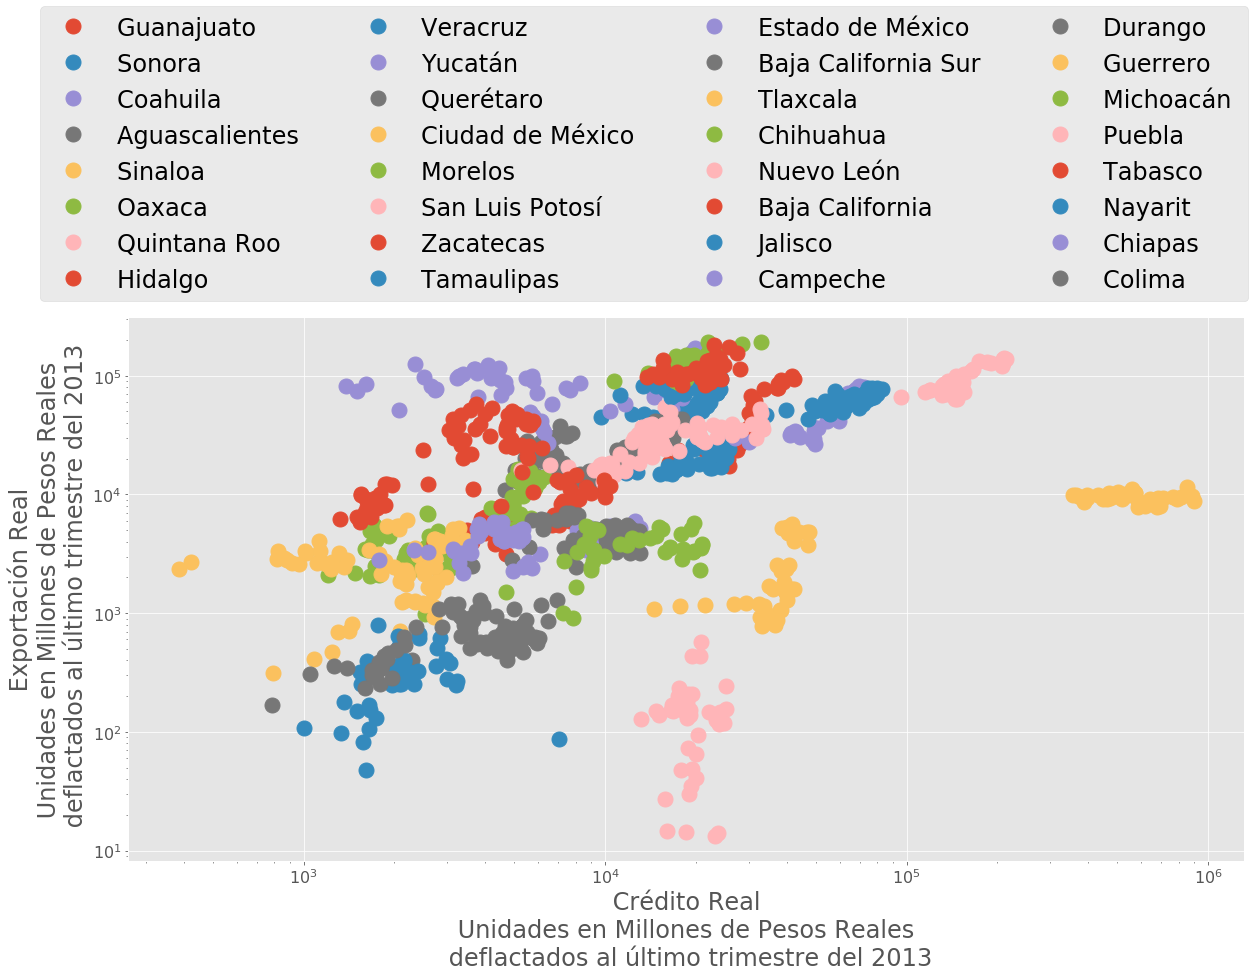

In [34]:
matplotlib.rcParams['figure.figsize'] = (16.0, 12.0)
matplotlib.style.use('ggplot')
plt.figure(figsize=(20,10))

for estado in Estados:
    aux = pd_estado[pd_estado['Estado']==estado]
    x = aux[' Crédito Real ']
    y = aux[' Exportación Real ']
    plt.plot(x, y, 'o', label=estado, markersize=15)


plt.legend(loc='center left', fontsize=24, bbox_to_anchor=(-0.09, 1.3), ncol=4)

plt.xticks(fontsize=16)
plt.yticks(fontsize=16)

plt.xscale('log')
plt.yscale('log')

plt.xlabel(' Crédito Real \n Unidades en Millones de Pesos Reales \n deflactados al último trimestre del 2013', fontsize=24)
plt.ylabel(' Exportación Real \n Unidades en Millones de Pesos Reales \n deflactados al último trimestre del 2013', fontsize=24)


# Se agrega la clasificación por tipo de frontera

In [19]:
pd_estado['Tipo frontera']='Sin frontera'

for i in range(len(pd_estado)):
    estado = pd_estado.iloc[i,1]
    if estado=='Baja California ' or estado=='Sonora ' or estado=='Chihuahua ' or estado=='Coahuila ' or estado=='Nuevo León ' or estado=='Tamaulipas ':
        tipo='Frontera Norte'
    elif estado=='Chiapas ' or estado=='Tabasco ' or estado=='Campeche ' or estado=='Quintana Roo ':
        tipo='Frontera Sur'
    else:
        tipo='Sin Frontera'
    pd_estado.loc[i,'Tipo frontera'] = tipo

In [20]:
pd_estado.head()

,Fecha,Estado,Crédito Real,Exportación Real,Tipo frontera
0,01/01/2007,Guanajuato,16250.28,18380.74,Sin Frontera
1,01/01/2007,Sonora,9702.99,44769.69,Frontera Norte
2,01/01/2007,Coahuila,10381.57,50033.29,Frontera Norte
3,01/01/2007,Aguascalientes,7647.50,15533.34,Sin Frontera
4,01/01/2007,Sinaloa,14512.32,1084.19,Sin Frontera


Text(0, 0.5, ' Exportación Real ')

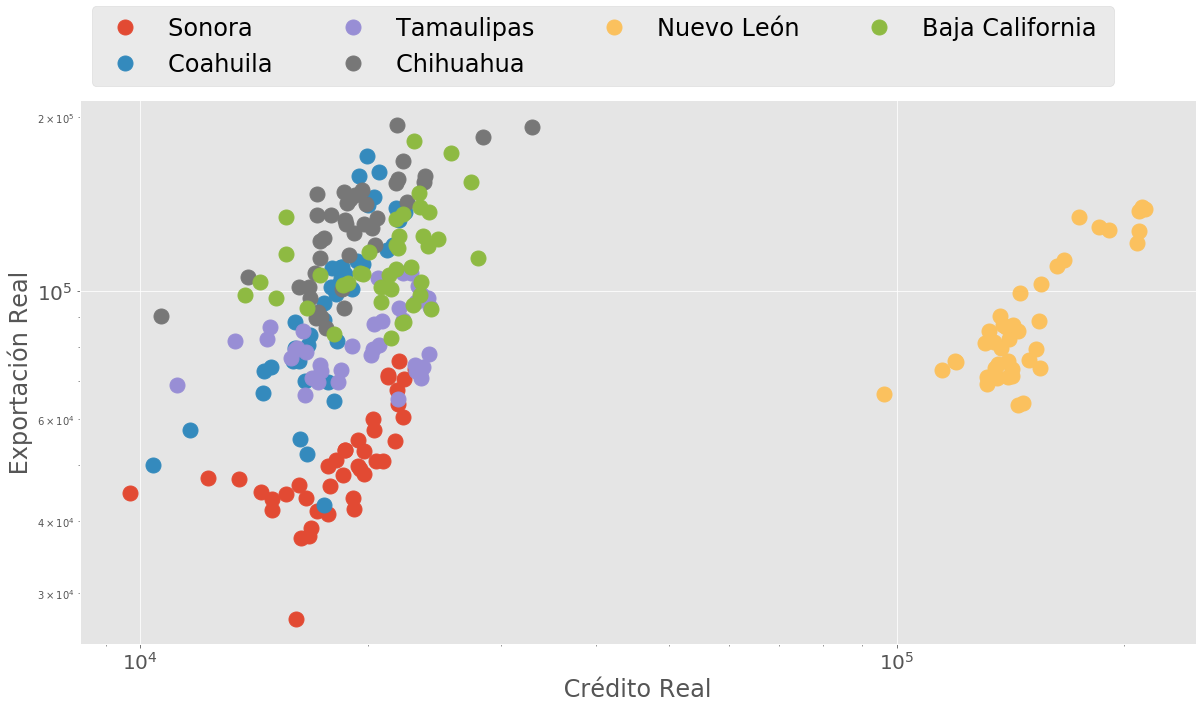

In [24]:
matplotlib.rcParams['figure.figsize'] = (16.0, 12.0)
matplotlib.style.use('ggplot')
plt.figure(figsize=(20,10))

for estado in Estados:
    aux = pd_estado[pd_estado['Estado']==estado]
    if aux.iloc[0,4]=='Frontera Norte':
        x = aux[' Crédito Real ']
        y = aux[' Exportación Real ']
        plt.plot(x, y, 'o', label=estado, markersize=15)


plt.legend(loc='center left', fontsize=24, bbox_to_anchor=(0., 1.1), ncol=4)

plt.xticks(fontsize=20)
plt.yticks(fontsize=20)

plt.xscale('log')
plt.yscale('log')

plt.xlabel(' Crédito Real ', fontsize=24)
plt.ylabel(' Exportación Real ', fontsize=24)

Text(0, 0.5, ' Exportación Real ')

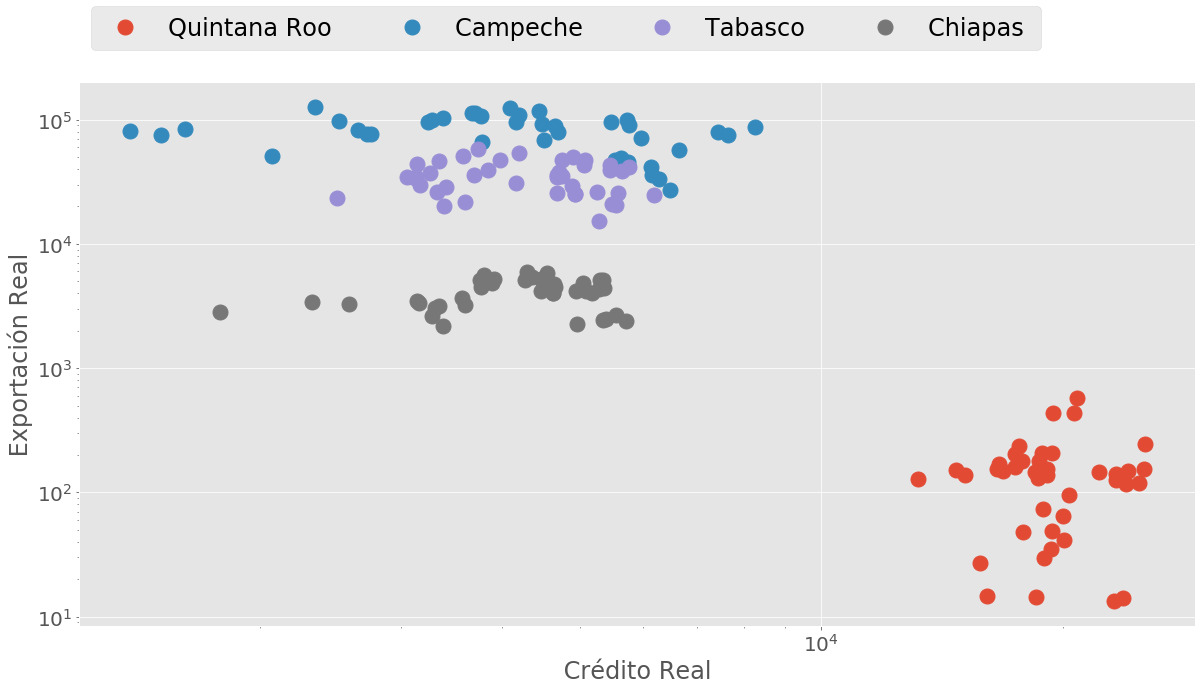

In [25]:
matplotlib.rcParams['figure.figsize'] = (16.0, 12.0)
matplotlib.style.use('ggplot')
plt.figure(figsize=(20,10))

for estado in Estados:
    aux = pd_estado[pd_estado['Estado']==estado]
    if aux.iloc[0,4]=='Frontera Sur':
        x = aux[' Crédito Real ']
        y = aux[' Exportación Real ']
        plt.plot(x, y, 'o', label=estado, markersize=15)


plt.legend(loc='center left', fontsize=24, bbox_to_anchor=(0., 1.1), ncol=4)

plt.xticks(fontsize=20)
plt.yticks(fontsize=20)

plt.xscale('log')
plt.yscale('log')

plt.xlabel(' Crédito Real ', fontsize=24)
plt.ylabel(' Exportación Real ', fontsize=24)

Text(0, 0.5, ' Exportación Real ')

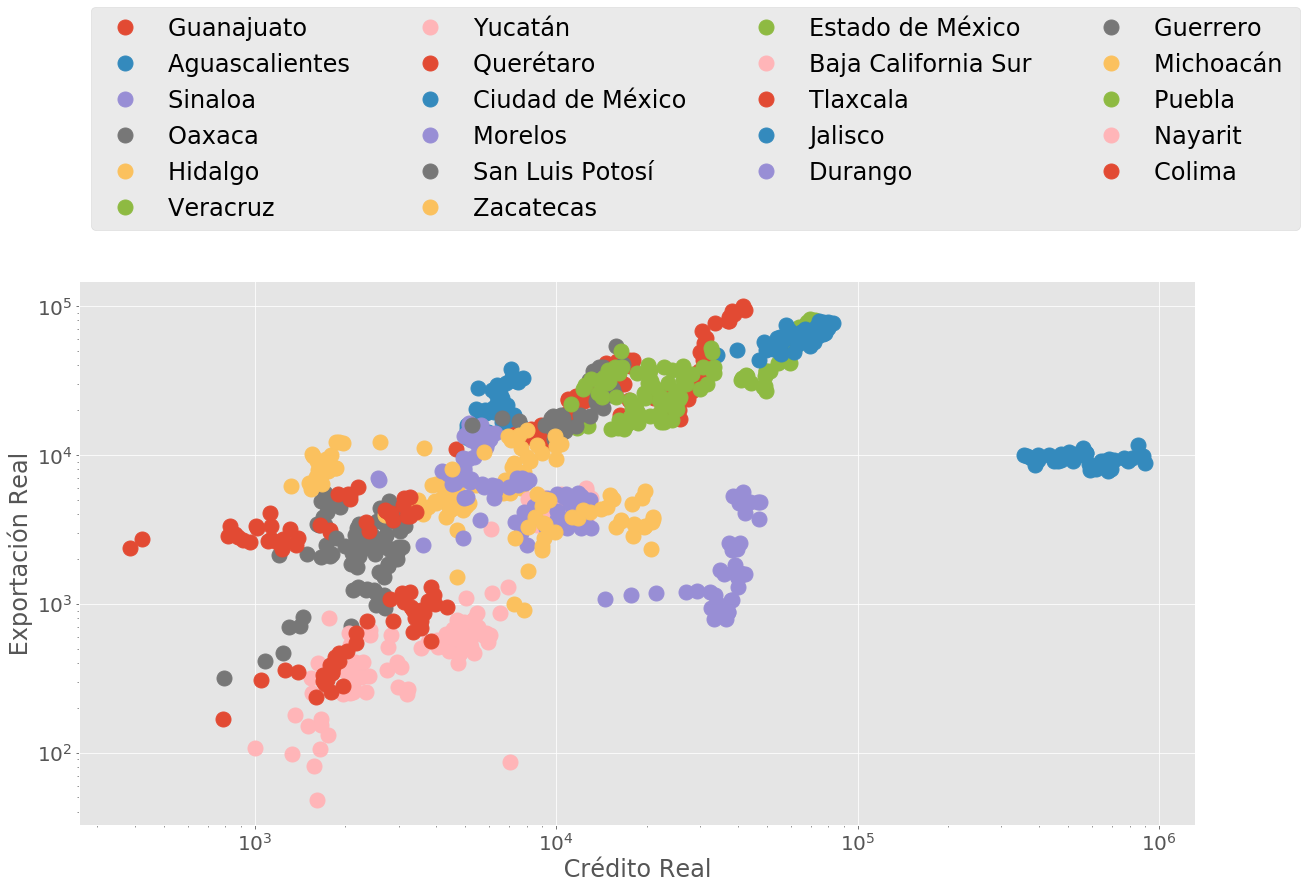

In [27]:
matplotlib.rcParams['figure.figsize'] = (16.0, 12.0)
matplotlib.style.use('ggplot')
plt.figure(figsize=(20,10))

for estado in Estados:
    aux = pd_estado[pd_estado['Estado']==estado]
    if aux.iloc[0,4]=='Sin Frontera':
        x = aux[' Crédito Real ']
        y = aux[' Exportación Real ']
        plt.plot(x, y, 'o', label=estado, markersize=15)


plt.legend(loc='center left', fontsize=24, bbox_to_anchor=(0., 1.3), ncol=4)

plt.xticks(fontsize=20)
plt.yticks(fontsize=20)

plt.xscale('log')
plt.yscale('log')

plt.xlabel(' Crédito Real ', fontsize=24)
plt.ylabel(' Exportación Real ', fontsize=24)